In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
''' This dataset has funding information of the Indian startups from January 2015 to August 2017.
Feature Details :
SNo - Serial number.
Date - Date of funding in format DD/MM/YYYY.
StartupName - Name of the startup which got funded.
IndustryVertical - Industry to which the startup belongs.
SubVertical - Sub-category of the industry type.
CityLocation - City which the startup is based out of.
InvestorsName - Name of the investors involved in the funding round.
InvestmentType - Either Private Equity or Seed Funding.
AmountInUSD - Funding Amount in USD.
Remarks - Other information, if any.
'''

### Printing the top 5 rows of the dataframe to have a glimpse of what type of data is stored.

In [3]:
df1 = pd.read_csv('startup_funding.csv')
df = df1.copy()
df.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
df.shape

(2372, 10)

In [8]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

### 1 . Checking the trend of investments by plotting number of fundings done in each year.

In [9]:
## need to extract year from Date column
df.Date.dtype

dtype('O')

In [46]:
## to find out issues in Date column like . and // in place of / in some dates .
unique_dates = df.Date.unique().tolist()
##unique_dates

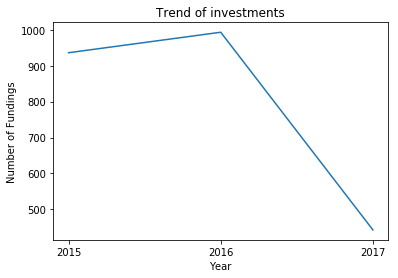

Year :  2015 , No. of fundings :  936
Year :  2016 , No. of fundings :  993
Year :  2017 , No. of fundings :  443


In [12]:
## removing issue in Date column
df.Date = df.Date.str.replace('.','/' )
df.Date = df.Date.str.replace('//','/')
## extracting year from date column
year = df.Date.str.split('/' , expand = True)[2]
## sorting year in chronological order
year =  year.value_counts().sort_index()
x = year.index
y = year.values
## plotting line plot
plt.plot(x,y)
plt.title('Trend of investments')
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.show()
for i in range(3):
    print('Year : ' , x[i],', No. of fundings : ' , y[i])

### 2. Top 10 Indian cities which have most number of startups .

In [50]:
''' On analysing CityLocation column i found some issues in city names 
 like bangalore and bangalore , Delhi and New delhi as shown.
 Also for few startups multiple locations are given, one Indian and one Foreign. i have counted those startups
 in Indian startup also after analysing the dataset. 
 '''
##df.CityLocation.unique().tolist()

' On analysing CityLocation column i found some issues in city names \n like bangalore and bangalore , Delhi and New delhi as shown.\n Also for few startups multiple locations are given, one Indian and one Foreign. i have counted those startups\n in Indian startup also after analysing the dataset. \n '

In [20]:
## droppping rows having NaN values in CityLocation column
dftemp = df.copy()
dftemp.CityLocation.dropna(inplace = True)
## sorting out issues in city names
def separateCity(city):
    return city.split('/')[0].strip()

dftemp.CityLocation = dftemp.CityLocation.apply(separateCity)
dftemp.CityLocation.replace('Delhi','New Delhi' , inplace = True)
dftemp.CityLocation.replace('bangalore' , 'Bangalore' , inplace = True)

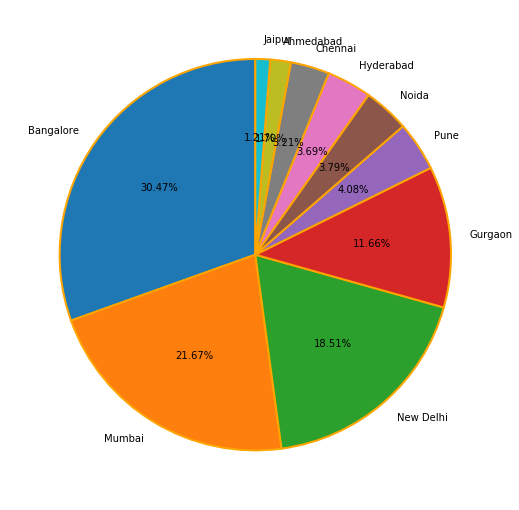

City :  Bangalore  , Number of Startups : 627
City :  Mumbai  , Number of Startups : 446
City :  New Delhi  , Number of Startups : 381
City :  Gurgaon  , Number of Startups : 240
City :  Pune  , Number of Startups : 84
City :  Noida  , Number of Startups : 78
City :  Hyderabad  , Number of Startups : 76
City :  Chennai  , Number of Startups : 66
City :  Ahmedabad  , Number of Startups : 35
City :  Jaipur  , Number of Startups : 25


In [21]:
## Counting startups in each city 
city_num = df.CityLocation.value_counts()[0:10]
city = city_num.index
num_city = city_num.values
## plotting a pie chart shwoing percentage share of each city in no. of startups they have 
plt.rcParams['figure.figsize'] = (15,9)
plt.pie(num_city , labels = city , autopct='%.2f%%' , startangle = 90 , wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" })
plt.show()
for i in range(len(city)):
    print('City : ' , city[i] ,' , Number of Startups :' , num_city[i])


### 3 .  Top 10 Indian cities with most amount of fundings received. Also calculating percentage of funding each city has got (among top 10 Indian cities only).

In [29]:
dftemp = df.copy()
dftemp.CityLocation.dropna(inplace = True)

def separateCity(city):
    return city.split('/')[0].strip()

dftemp.CityLocation = dftemp.CityLocation.apply(separateCity)
dftemp.CityLocation.replace('Delhi','New Delhi' , inplace = True)
dftemp.CityLocation.replace('bangalore' , 'Bangalore' , inplace = True)
## Removing ',' in Amount column and converting it to integer
dftemp.AmountInUSD = dftemp.AmountInUSD.apply(lambda x : float(str(x).replace(',','')))
dftemp.AmountInUSD = pd.to_numeric(dftemp.AmountInUSD)
## Calculating citywise amount of funding received.
city_amount = dftemp.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:10]
city = city_amount.index
amountCity = city_amount.values
## calculating percentage of the funding each city has received .
perAmount = np.true_divide(amountCity , amountCity.sum())*100

for i in range(len(city)):
    print(city[i] , format(perAmount[i], '.2f'),'%')

Bangalore 49.71 %
New Delhi 16.63 %
Mumbai 13.90 %
Gurgaon 12.21 %
Chennai 2.43 %
Pune 2.16 %
Hyderabad 1.15 %
Noida 1.01 %
Ahmedabad 0.58 %
Jaipur 0.21 %


### 4. Percentage of amount funded for each investment type ( there are 4 investment types).

In [47]:
## finding spelling mistakes in Investmenttype column .
##df.InvestmentType.unique().tolist()

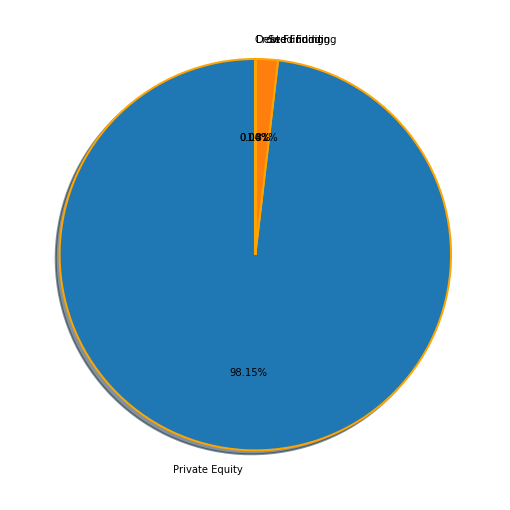

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [32]:
##correcting spelling mistakes in Investmenttype column.
dftemp = df.copy()
dftemp.InvestmentType.replace('SeedFunding' , 'Seed Funding' , inplace = True)
dftemp.InvestmentType.replace('PrivateEquity' , 'Private Equity' , inplace = True)
dftemp.InvestmentType.replace('Crowd funding' , 'Crowd Funding' , inplace = True)

dftemp.AmountInUSD = dftemp.AmountInUSD.apply(lambda x : float(str(x).replace(',','')))
dftemp.AmountInUSD = pd.to_numeric(dftemp.AmountInUSD)
##Calculating amount for each investment type and arranging in descending order on the basis of amount .
investmentamount = dftemp.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)[0:4]
investmenttype = investmentamount.index
amount = investmentamount.values
## plotting pie chart .
##plt.rcParams['figure.figsize'] = (15,9)
plt.pie(amount , labels = investmenttype ,autopct='%.2f%%' , startangle = 90 ,shadow = True,wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" })
plt.show()
## calculating percentage amount for each city .
peramount = np.true_divide(amount , amount.sum())*100

for i in range(4):
    print(investmenttype[i] , format(peramount[i] ,'.2f'))

### 5. Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

In [48]:
## finding title and non-title case issue in industry name as shown.
##df.IndustryVertical.unique().tolist()

In [35]:
##correcting the above stated issue.
df['IndustryVertical'].replace("ECommerce","Ecommerce", inplace = True)
df['IndustryVertical'].replace("eCommerce","Ecommerce", inplace = True)
df['IndustryVertical'].replace("ecommerce","Ecommerce", inplace = True)

## converting amount to int type
df.AmountInUSD = df.AmountInUSD.apply(lambda x : float(str(x).replace(',','')))
df.AmountInUSD = pd.to_numeric(df.AmountInUSD)

##calculating industry wise amount
ivc = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]
industry = ivc.index
amount = ivc.values
## calculating the percentage of total amount funded .
per = np.true_divide(amount  , amount.sum())*100

for i in range(5):
    print(industry[i] , format(per[i] , '.2f'))




Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


### 6. Top 5 startups with most amount of total funding

In [49]:
## Correcting names of Ola, Flipkart, Oyo, Paytm startups .
## below way works only when there are no NaN values , so to use this technique with other columns , drop NaN from
## those columns
##for i in np.unique(sorted(df.StartupName)):
##    print(i)

In [41]:
reader = df1.copy()
## correcting names 
reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
## converting amount column to int
reader['AmountInUSD'] = reader['AmountInUSD'].str.replace(',', '')
reader['AmountInUSD'] = pd.to_numeric(reader['AmountInUSD'])
## startup wise calculating amount.    
invest = reader.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)
print('Top 5 startups with most amount of funding in descng order are as follows : ')
for i in range(5):
    print(invest.index[i])

Top 5 startups with most amount of funding in descng order are as follows : 
Paytm
Flipkart
Ola
Snapdeal
Oyo


### 7. Top 5 startups that received the most number of funding rounds.(i.e. funding most number of times)

In [42]:
## reader is the dataframe object 
startup_number = reader.StartupName.value_counts()
su = startup_number.index
val = startup_number.values
for i in range(5):
    print(su[i] , val[i])


Ola 9
Swiggy 7
Oyo 6
UrbanClap 6
Paytm 6


### 8 .The Investor who have invested maximum number of times.

In [45]:
## removing rows having NA value in InvestorsName column
df = df[pd.notna(df.InvestorsName)]
inv_name = df.InvestorsName
# a dictionary to store count of no. of times an investor has invested.
d = {}
for row in inv_name.iteritems():
    ## as row[0] will contain row lable so using row[1] and splitting investor's name to get one name at a time in next for loop
    v = row[1].split(',')
    for i in v:
        i = i.strip()
        d[i] = d.get(i,0) + 1
ans = -1
val = ''
for v in d:
    if(d[v] > ans):
        ans = d[v]
        val = v
print(val, ':' , int(ans) , 'times')

Sequoia Capital : 64 times
